<a href="https://colab.research.google.com/github/Tushararora1210/StockPredictionUsingKNN/blob/master/Stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install quandl

In [0]:

import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import datetime
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [0]:
def dayofdate(y,m,d):
  day=calendar.weekday(y,m,d)
  return day


In [0]:
quandl.ApiConfig.api_key = "r3MzRrZM4NGzo8FTZ_6M"
df=quandl.get("WIKI/FB") 
#df=quandl.get("WIKI/AAPL")
#df=quandl.get("WIKI/MSFT")

print(df)

              Open    High     Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                                ...                                   
2012-05-18   42.05   45.00   38.00  ...     38.00     38.2318  573576400.0
2012-05-21   36.53   36.66   33.00  ...     33.00     34.0300  168192700.0
2012-05-22   32.61   33.59   30.94  ...     30.94     31.0000  101786600.0
2012-05-23   31.37   32.50   31.36  ...     31.36     32.0000   73600000.0
2012-05-24   32.95   33.21   31.77  ...     31.77     33.0300   50237200.0
...            ...     ...     ...  ...       ...         ...          ...
2018-03-21  164.80  173.40  163.30  ...    163.30    169.3900  105350867.0
2018-03-22  166.13  170.27  163.72  ...    163.72    164.8900   73389988.0
2018-03-23  165.44  167.10  159.02  ...    159.02    159.3900   52306891.0
2018-03-26  160.82  161.10  149.02  ...    149.02    160.0600  125438294.0
2018-03-27  156.31  162.85  150.75  ...    150.75    152.1900   76787884.0

[1472 rows x 12 columns]

In [0]:
a=[]
for i in range(df.shape[0]):
  a.append(i)
df['index']=a
day=[]
year=[]
month=[]
date=[]
week=[]
ismonthend=[]
ismonthstart=[]
isyearstart=[]
isquarterstart=[]
isyearend=[]
isquarterend=[]
for i in df.index:
  i=str(i)
  i=i[:-9]
  y,m,d=i.split('-')
  y=int(y)
  m=int(m)
  d=int(d)
  if(m>9):
    isyearend.append(1)
  else:
    isyearend.append(0)
  if(m<4):
    isyearstart.append(1)
  else:
    isyearstart.append(0)
  if((m%3)==0):
    isquarterend.append(1)
    isquarterstart.append(0)
  elif((m%3)==1):
    isquarterstart.append(1)
    isquarterend.append(0)
  else:
    isquarterend.append(0)
    isquarterstart.append(0)
  if(d>24):
    ismonthend.append(1)
    ismonthstart.append(0)
  elif(d<=7):
    ismonthstart.append(1)
    ismonthend.append(0)
  else:
    ismonthend.append(0)
    ismonthstart.append(0)
  year.append(y)
  month.append(m)
  date.append(d)
  day.append(dayofdate(y,m,d))
  week.append(datetime.date(y,m,d).strftime("%V"))


df['day of week']=day
df['year']=year
df['month of year']=month
df['day of month']=date
df['week of year']=week
df['is_month_end']=ismonthend
df['is_month_start']=ismonthstart
df['is_quarter_end']=isquarterend
df['is_quarter_start']=isquarterstart
df['is_year_end']=isyearend
df['is_year_start']=isyearstart

print(df)

              Open    High  ...  is_year_end  is_year_start
Date                        ...                            
2012-05-18   42.05   45.00  ...            0              0
2012-05-21   36.53   36.66  ...            0              0
2012-05-22   32.61   33.59  ...            0              0
2012-05-23   31.37   32.50  ...            0              0
2012-05-24   32.95   33.21  ...            0              0
...            ...     ...  ...          ...            ...
2018-03-21  164.80  173.40  ...            0              1
2018-03-22  166.13  170.27  ...            0              1
2018-03-23  165.44  167.10  ...            0              1
2018-03-26  160.82  161.10  ...            0              1
2018-03-27  156.31  162.85  ...            0              1

[1472 rows x 24 columns]


In [0]:
train=df[:int(df.shape[0]*0.8)]
valid=df[int(df.shape[0]*0.8):]
xtrain=train[['index','day of week','day of month','month of year','year','week of year','is_month_end','is_month_start','is_quarter_end','is_quarter_start','is_year_start','is_year_end']]
ytrain=train[['Adj. Close']]
xvalid=valid[['index','day of week','day of month','month of year','year','week of year','is_month_end','is_month_start','is_quarter_end','is_quarter_start','is_year_start','is_year_end']]
yvalid=valid[['Adj. Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(xvalid)
xvalid = pd.DataFrame(x_valid_scaled)
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(xtrain,ytrain)


preds=model.predict(xvalid)
rms=np.sqrt(np.mean(np.power((np.array(yvalid)-np.array(preds)),2)))
print(rms)

110.9064768139847


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


            Predictions  Adj. Close
Date                               
2017-01-24      30.7745      129.37
2017-01-25      31.0150      131.48
2017-01-26      31.2605      132.78
2017-01-27      31.2605      132.18
2017-01-30      31.6295      130.98
...                 ...         ...
2018-03-21     112.3600      169.39
2018-03-22     112.0350      164.89
2018-03-23     112.2500      159.39
2018-03-26     114.9150      160.06
2018-03-27     114.9150      152.19

[295 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Price-->')

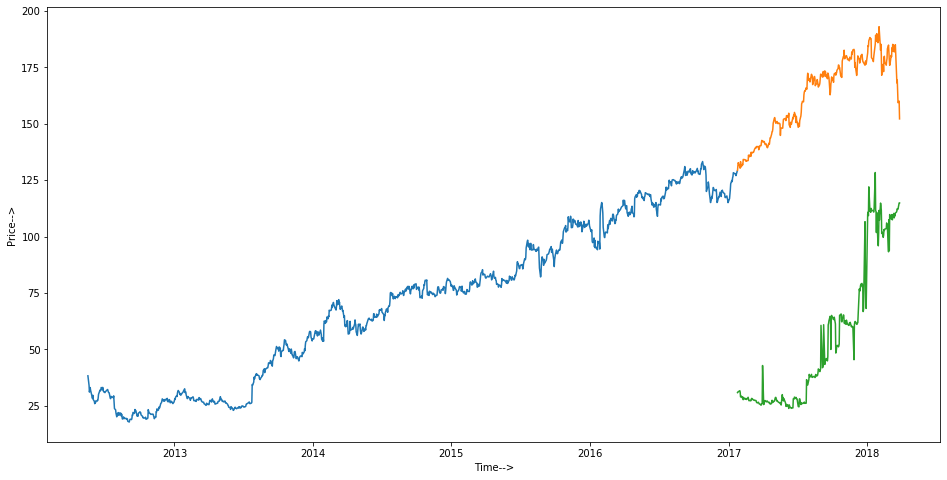

In [0]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.plot(train['Adj. Close'])
print(valid[['Predictions','Adj. Close']])
plt.plot(valid[['Adj. Close', 'Predictions']])
plt.xlabel('Time-->')
plt.ylabel('Price-->')



In [0]:
start = datetime.datetime.strptime("2018-03-28", "%Y-%m-%d")
end = datetime.datetime.strptime("2018-04-28", "%Y-%m-%d")
date_array = \
    (start + datetime.timedelta(days=x) for x in range(0, (end-start).days))
x={'Date':[],'day of week':[],'year':[],'month of year':[],'day of month':[],'week of year':[],'is_month_end':[],'is_month_start':[],'is_year_end':[],'is_year_start':[],'is_quarter_end':[],'is_quarter_start':[]}
for date_object in date_array:
    x['Date'].append(date_object.strftime("%Y-%m-%d"))



day=[]
year=[]
month=[]
date=[]
week=[]
ismonthend=[]
ismonthstart=[]
isyearstart=[]
isquarterstart=[]
isyearend=[]
isquarterend=[]
for i in x['Date']:
  i=str(i)
  y,m,d=i.split('-')
  y=int(y)
  m=int(m)
  d=int(d)
  if(m>9):
    isyearend.append(1)
  else:
    isyearend.append(0)
  if(m<4):
    isyearstart.append(1)
  else:
    isyearstart.append(0)
  if((m%3)==0):
    isquarterend.append(1)
    isquarterstart.append(0)
  elif((m%3)==1):
    isquarterstart.append(1)
    isquarterend.append(0)
  else:
    isquarterend.append(0)
    isquarterstart.append(0)
  if(d>24):
    ismonthend.append(1)
    ismonthstart.append(0)
  elif(d<=7):
    ismonthstart.append(1)
    ismonthend.append(0)
  else:
    ismonthend.append(0)
    ismonthstart.append(0)
  year.append(y)
  month.append(m)
  date.append(d)
  day.append(dayofdate(y,m,d))
  week.append(datetime.date(y,m,d).strftime("%V"))
x['year']=year
x['day of week']=day
x['month of year']=month
x['day of month']=date
x['week of year']=week
x['is_month_end']=ismonthend
x['is_month_start']=ismonthstart
x['is_quarter_end']=isquarterend
x['is_quarter_start']=isquarterstart
x['is_year_end']=isyearend
x['is_year_start']=isyearstart

x=pd.DataFrame(x,index=x['Date'])
x=x.drop('Date',axis=1)
a=[]
for i in range(x.shape[0]):
  a.append(i)
x['index']=a


x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
y=model.predict(x_scaled)
x['Predicted Price']=y
print(x)

            day of week  year  ...  index  Predicted Price
2018-03-28            2  2018  ...      0           31.425
2018-03-29            3  2018  ...      1           60.965
2018-03-30            4  2018  ...      2           60.965
2018-03-31            5  2018  ...      3           77.280
2018-04-01            6  2018  ...      4           88.385
2018-04-02            0  2018  ...      5           27.330
2018-04-03            1  2018  ...      6           27.330
2018-04-04            2  2018  ...      7           27.330
2018-04-05            3  2018  ...      8           48.560
2018-04-06            4  2018  ...      9           48.560
2018-04-07            5  2018  ...     10           88.385
2018-04-08            6  2018  ...     11           78.645
2018-04-09            0  2018  ...     12           49.855
2018-04-10            1  2018  ...     13           74.810
2018-04-11            2  2018  ...     14           74.810
2018-04-12            3  2018  ...     15           74.8